In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
# prefix = "../build/"
prefix = "./timeSqExp/testNaive/"


df = pd.read_csv(prefix+"data50.csv")
df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
df["x+"] = df["x"] + df["x_std"]
df["y+"] = df["y"] + df["y_std"]
df["z+"] = df["z"] + df["z_std"]
df["x-"] = df["x"] - df["x_std"]
df["y-"] = df["y"] - df["y_std"]
df["z-"] = df["z"] - df["z_std"]

df.head()


,x,y,z,x_std,y_std,z_std,gnd_x,gnd_y,gnd_z,time,x+,y+,z+,x-,y-,z-
0,0.565507,3.43753,-0.644764,0.070947,0.052401,0.076628,0.567764,4.66333,-0.500781,1530,0.636454,3.489932,-0.568136,0.494560,3.385128,-0.721392
1,0.226893,4.67324,-2.206780,0.099768,0.063244,0.094179,0.667514,5.13073,-2.273380,500,0.326661,4.736484,-2.112601,0.127125,4.609996,-2.300959
2,0.106646,5.13396,-3.218000,0.103740,0.064876,0.083916,0.658673,5.50181,-3.307870,467,0.210386,5.198836,-3.134084,0.002906,5.069084,-3.301916
3,0.155630,5.16026,-3.168610,0.100328,0.062678,0.081540,0.686461,5.55597,-3.306500,492,0.255958,5.222938,-3.087070,0.055302,5.097582,-3.250150
4,0.311739,4.70252,-2.329230,0.093881,0.059130,0.088603,0.860482,5.11509,-2.451900,525,0.405620,4.761650,-2.240627,0.217858,4.643390,-2.417833


<IPython.core.display.Javascript object>


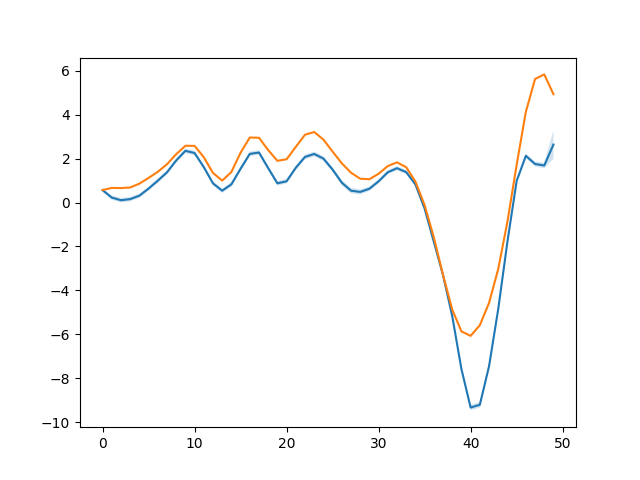

<IPython.core.display.Javascript object>


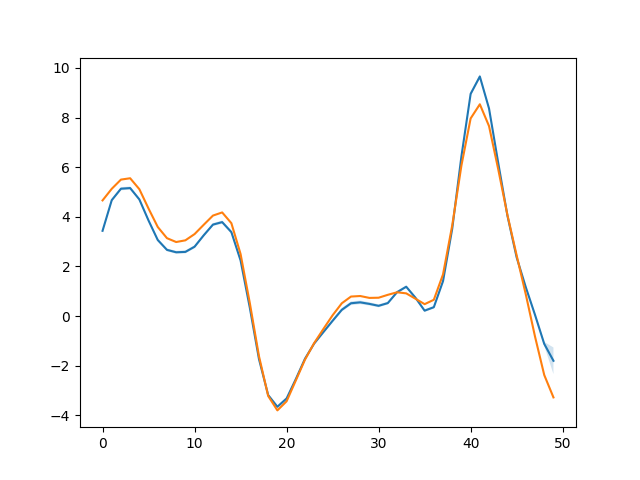

<IPython.core.display.Javascript object>


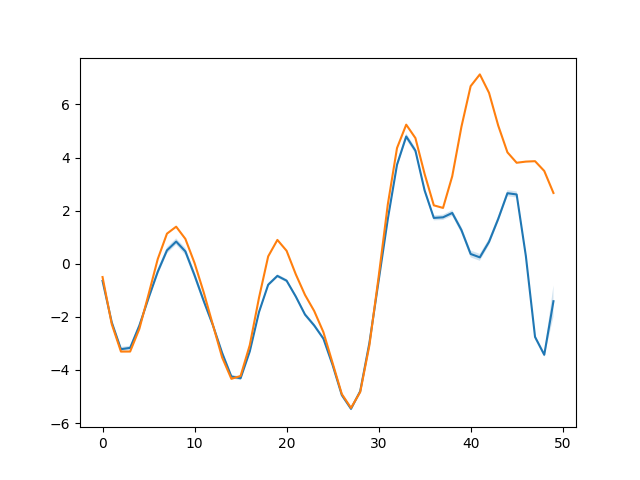

In [3]:
plt.plot(df.index, df['x'])
plt.fill_between(df.index, df['x+'], df['x-'], alpha=0.2)
plt.plot(df.index, df['gnd_x'])

plt.figure()

plt.plot(df.index, df['y'])
plt.fill_between(df.index, df['y+'], df['y-'], alpha=0.2)
plt.plot(df.index, df['gnd_y'])


plt.figure()
plt.plot(df.index, df['z'])
plt.fill_between(df.index, df['z+'], df['z-'], alpha=0.2)
plt.plot(df.index, df['gnd_z'])

plt.show()


7.815022864521066


<IPython.core.display.Javascript object>


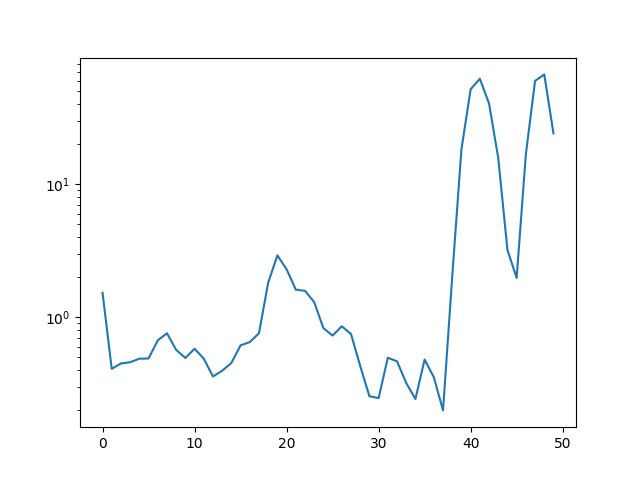

In [4]:
se = (df["x"]-df["gnd_x"])**2 + (df["y"]-df["gnd_y"])**2 + (df["z"]-df["gnd_z"])**2
mse = sum(se)/len(df['x'])
print(mse)
plt.figure()
plt.yscale("log")
plt.plot(df.index, se)
plt.show()

<IPython.core.display.Javascript object>


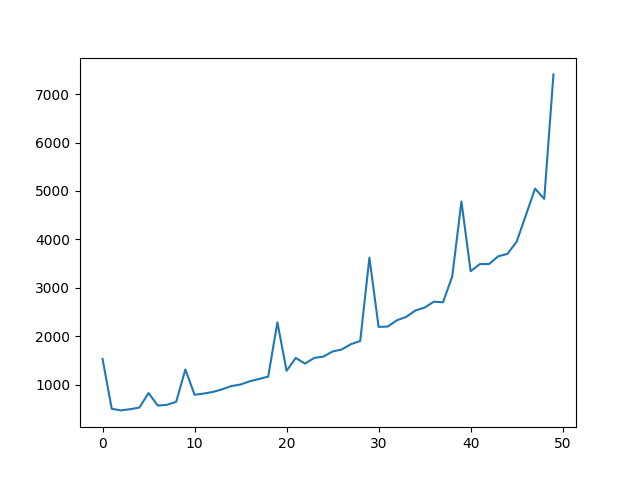

107663 ms


In [5]:
plt.figure()
plt.plot(df.index, df['time'])
print(sum(df['time']), "ms")
plt.show()

In [6]:
anchors = pd.read_csv(prefix+"anchors10.csv")
anchors.columns = ['x','y','z']
anchors.head()


,x,y,z
0,-0.487863,-4.347270,2.737160
1,-4.300760,0.133078,2.979340
2,0.134424,-2.106550,1.850130
3,0.802798,8.498710,1.486880
4,4.083850,3.133630,-0.511368


<IPython.core.display.Javascript object>


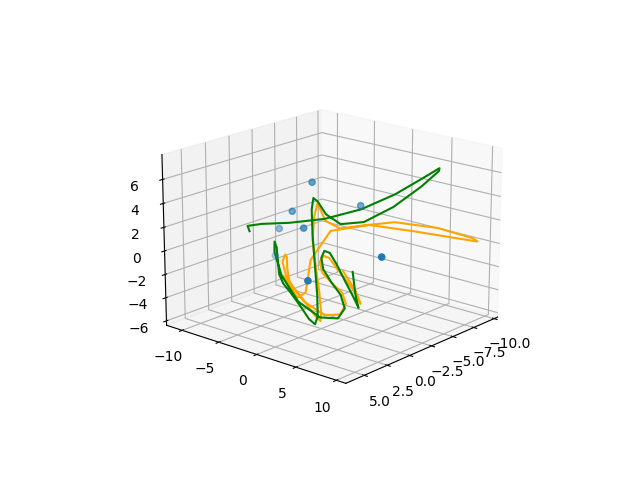

In [7]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(anchors['x'], anchors['y'], anchors['z'])
ax.plot(df['x'],df['y'],df['z'], c="orange")
ax.plot(df['gnd_x'],df['gnd_y'],df['gnd_z'], c="green")



In [8]:
print(sum(df['time'])/10**6, "s")
print(se[len(se)-1])

0.107663 s
24.055867712599994


200 step fully connected
8953 ms
0.018081515014227126

200 step fully connected
21 ms
0.018128581248011585
